In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, ElasticNetCV, HuberRegressor, SGDRegressor
from sklearn.linear_model import RANSACRegressor, HuberRegressor, PoissonRegressor, TweedieRegressor, Lars
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, ExtraTreesRegressor,  VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans
from sklearn.exceptions import NotFittedError
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore", category= ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
import numpy as np
#from catboost import CatBoostRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import BayesianRidge
# import h2o
# from h2o.automl import H2OAutoML
# from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# from h2o.estimators.gbm import H2OGradientBoostingEstimator
# from h2o.estimators.random_forest import H2ORandomForestEstimator
# from h2o.estimators.deeplearning import H2ODeepLearningEstimator
# # Khởi tạo H2O
# h2o.init()

## Bước 1: Chạy tất cả model

In [22]:
data = pd.read_csv('dataset/Defined_salary.csv')
data.columns = data.columns.str.replace(r'[\s:]', '_', regex=True)
# Dữ liệu đầu vào và nhãn đầu ra
X = data.drop('Salary', axis=1)  # Dữ liệu đầu vào (tất cả các cột trừ 'Salary')
y = data['Salary']  # Nhãn đầu ra (cột 'Salary')

# Chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#SMOTE 
def train_and_evaluate(models_dict, X_train, y_train, X_test, y_test):
    results = {}
    trained_models = {}
    for model_name, model in models_dict.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            results[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
            trained_models[model_name] = model  # Lưu mô hình đã huấn luyện
            print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")
        except Exception as e:
            print(f"Error in {model_name}: {e}")
    
    return results
    #return results, trained_models

In [23]:
# Các mô hình tuyến tính
linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "RidgeCV": RidgeCV(),
    "LARS Regression": Lars(),
    "OMP Regression": OrthogonalMatchingPursuit(),
    # "H2O Generalized Linear Model (GLM)": H2OGeneralizedLinearEstimator(),
    # "Theil-Sen Regressor": TheilSenRegressor(),
}
model_results_part_1 = train_and_evaluate(linear_models, X_train, y_train, X_test, y_test)

Linear Regression: MAE=3661838.8767114053, RMSE=13382070.715414926, R²=0.10377896744321002
Ridge Regression: MAE=3661542.3803009572, RMSE=13382088.03579516, R²=0.10377664748848381
Lasso Regression: MAE=3662067.6501726303, RMSE=13382009.693585146, R²=0.10378714090511554
ElasticNet Regression: MAE=3523228.1903029885, RMSE=13486160.072105978, R²=0.08978264673522096
ElasticNetCV: MAE=4944502.310440663, RMSE=14116584.11222672, R²=0.0026956092399605946
RidgeCV: MAE=3646154.256368843, RMSE=13383603.41187264, R²=0.10357366088119935
LARS Regression: MAE=7314361519.060359, RMSE=16007784071.126518, R²=-1282420.8993590618
OMP Regression: MAE=3639275.073783404, RMSE=13442641.362393806, R²=0.09564755907311351


In [4]:
# Các mô hình học máy phi tuyến
non_linear_models = {
    "Support Vector Regression (SVR)": SVR(),
    "LinearSVR": LinearSVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(),
    "Gaussian Process Regressor": GaussianProcessRegressor(),
    # "H2O Deep Learning": H2ODeepLearningEstimator()
}
# Đánh giá các mô hình học máy phi tuyến
model_results_part_2 = train_and_evaluate(non_linear_models, X_train, y_train, X_test, y_test)

Support Vector Regression (SVR): MAE=4558849.616407101, RMSE=14365446.387830967, R²=-0.032777438705601236
LinearSVR: MAE=10400701.032001464, RMSE=17734042.361342855, R²=-0.5739247828433784
Decision Tree Regressor: MAE=3573575.9041675734, RMSE=19102447.19848792, R²=-0.826192296927311
KNeighbors Regressor: MAE=3228354.975530179, RMSE=11849768.35401095, R²=0.29727045684736886
MLP Regressor: MAE=10532193.0773252, RMSE=17755418.320080046, R²=-0.5777213710363363
Gaussian Process Regressor: MAE=7537858.220960463, RMSE=13846999.223723229, R²=0.04042300757189432


In [ ]:
# Các mô hình cây (tree-based models)
tree_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor(),
    "ExtraTrees Regressor": ExtraTreesRegressor(),
    "HistGradientBoosting Regressor": HistGradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    # "H2O GBM": H2OGradientBoostingEstimator(),
    # "H2O Gradient Boosting Machine (GBM)": H2OGradientBoostingEstimator(),
    # "H2O Random Forest": H2ORandomForestEstimator()
}
# Đánh giá các mô hình cây (tree-based models)
model_results_part_3 = train_and_evaluate(linear_models, X_train, y_train, X_test, y_test) = train_and_evaluate(tree_models, X_train, y_train, X_test, y_test)

Decision Tree Regressor: MAE=3569876.0672997106, RMSE=19108133.822319526, R²=-0.8272797402552883
Random Forest Regressor: MAE=2967775.366757547, RMSE=11700438.24988648, R²=0.3148703722439802
Gradient Boosting Regressor: MAE=3329561.092446236, RMSE=13228099.96289707, R²=0.12428371293909157
XGBoost Regressor: MAE=3073894.25, RMSE=11791484.097653527, R²=0.3041662573814392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 12258, number of used features: 133
[LightGBM] [Info] Start training from score 12729195.301028
LightGBM Regressor: MAE=3440771.2214303184, RMSE=11422186.255503649, R²=0.34706948487140243


  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Long\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                   

ExtraTrees Regressor: MAE=2820497.2008350175, RMSE=11402979.477517335, R²=0.34926348650538763
HistGradientBoosting Regressor: MAE=3454469.3874871447, RMSE=12314249.030701298, R²=0.24110034593435836
Bagging Regressor: MAE=2998602.861630727, RMSE=12342983.200368498, R²=0.23755456853039603


In [21]:
# Các mô hình đặc biệt
special_models = {
    "Huber Regressor": HuberRegressor(),
    "RANSAC Regressor": RANSACRegressor(),
    "Poisson Regressor": PoissonRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "Bayesian Ridge Regression": BayesianRidge()
}
# Đánh giá các mô hình đặc biệt: 
model_results_part_4,_ = train_and_evaluate(special_models, X_train, y_train, X_test, y_test)

Huber Regressor: MAE=3155615.7042986425, RMSE=13550740.98292861, R²=0.08104429406761782
RANSAC Regressor: MAE=4080680.2720066467, RMSE=13914273.321130747, R²=0.03107636273559855
Poisson Regressor: MAE=3709006.254231698, RMSE=15038523.802709801, R²=-0.13182401831127466
SGD Regressor: MAE=6356615569431404.0, RMSE=1.1368295567155312e+16, R²=-6.467839041335384e+17
Passive Aggressive Regressor: MAE=4431141.813847708, RMSE=14051120.92656003, R²=0.011923811206082657
Bayesian Ridge Regression: MAE=4944941.519176032, RMSE=14117543.973743806, R²=0.0025599805860347935


In [7]:
# Các mô hình tăng cường (ensemble models)
ensemble_models = {
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    #"CatBoost Regressor": CatBoostRegressor(verbose=0),
    "Voting Regressor":  VotingRegressor(estimators=[
            ('lr', LinearRegression()),
            ('ridge', Ridge(alpha=1.0)),
            ('lasso', Lasso(alpha=0.1)),
            ('svr', SVR(C=1.0, kernel='rbf')),
            ('dt', DecisionTreeRegressor(max_depth=5)),
            ('knn', KNeighborsRegressor(n_neighbors=5))
        ]),
    "Stacking Regressor": StackingRegressor(
            estimators=[
                ('lr', LinearRegression()),
                ('ridge', Ridge(alpha=1.0)),
                ('lasso', Lasso(alpha=0.1)),
                ('svr', SVR(C=1.0, kernel='rbf')),
                ('dt', DecisionTreeRegressor(max_depth=5)),
                ('knn', KNeighborsRegressor(n_neighbors=5))
            ],
            final_estimator=LinearRegression() 
        ),
    # "H2O AutoML": H2OAutoML(max_models=10, seed=42)
}
# Đánh giá các mô hình Ensemble
model_results_part_5 = train_and_evaluate(ensemble_models, X_train, y_train, X_test, y_test)

AdaBoost Regressor: MAE=9972224.050020693, RMSE=29369455.59353151, R²=-3.3167836524202468
Bagging Regressor: MAE=3226428.2579131583, RMSE=14041710.885365197, R²=0.01324679807752216
Voting Regressor: MAE=3211856.4675131557, RMSE=12937157.669587912, R²=0.16238155383847253
Stacking Regressor: MAE=3155411.717701573, RMSE=12226197.039652895, R²=0.2519144395308446


In [8]:
# Các mô hình phân cụm
clustering_models = {
    "K-Means Clustering": KMeans()
}
# Đánh giá các mô hình Clustering
model_results_part_6 = train_and_evaluate(clustering_models, X_train, y_train, X_test, y_test)

K-Means Clustering: MAE=12559197.170962479, RMSE=18908992.69077084, R²=-0.7893911235841717


## Bước 2: Vẽ biểu đồ so sánh hiệu suất 

Biểu đồ dự đoán cho linear_models:


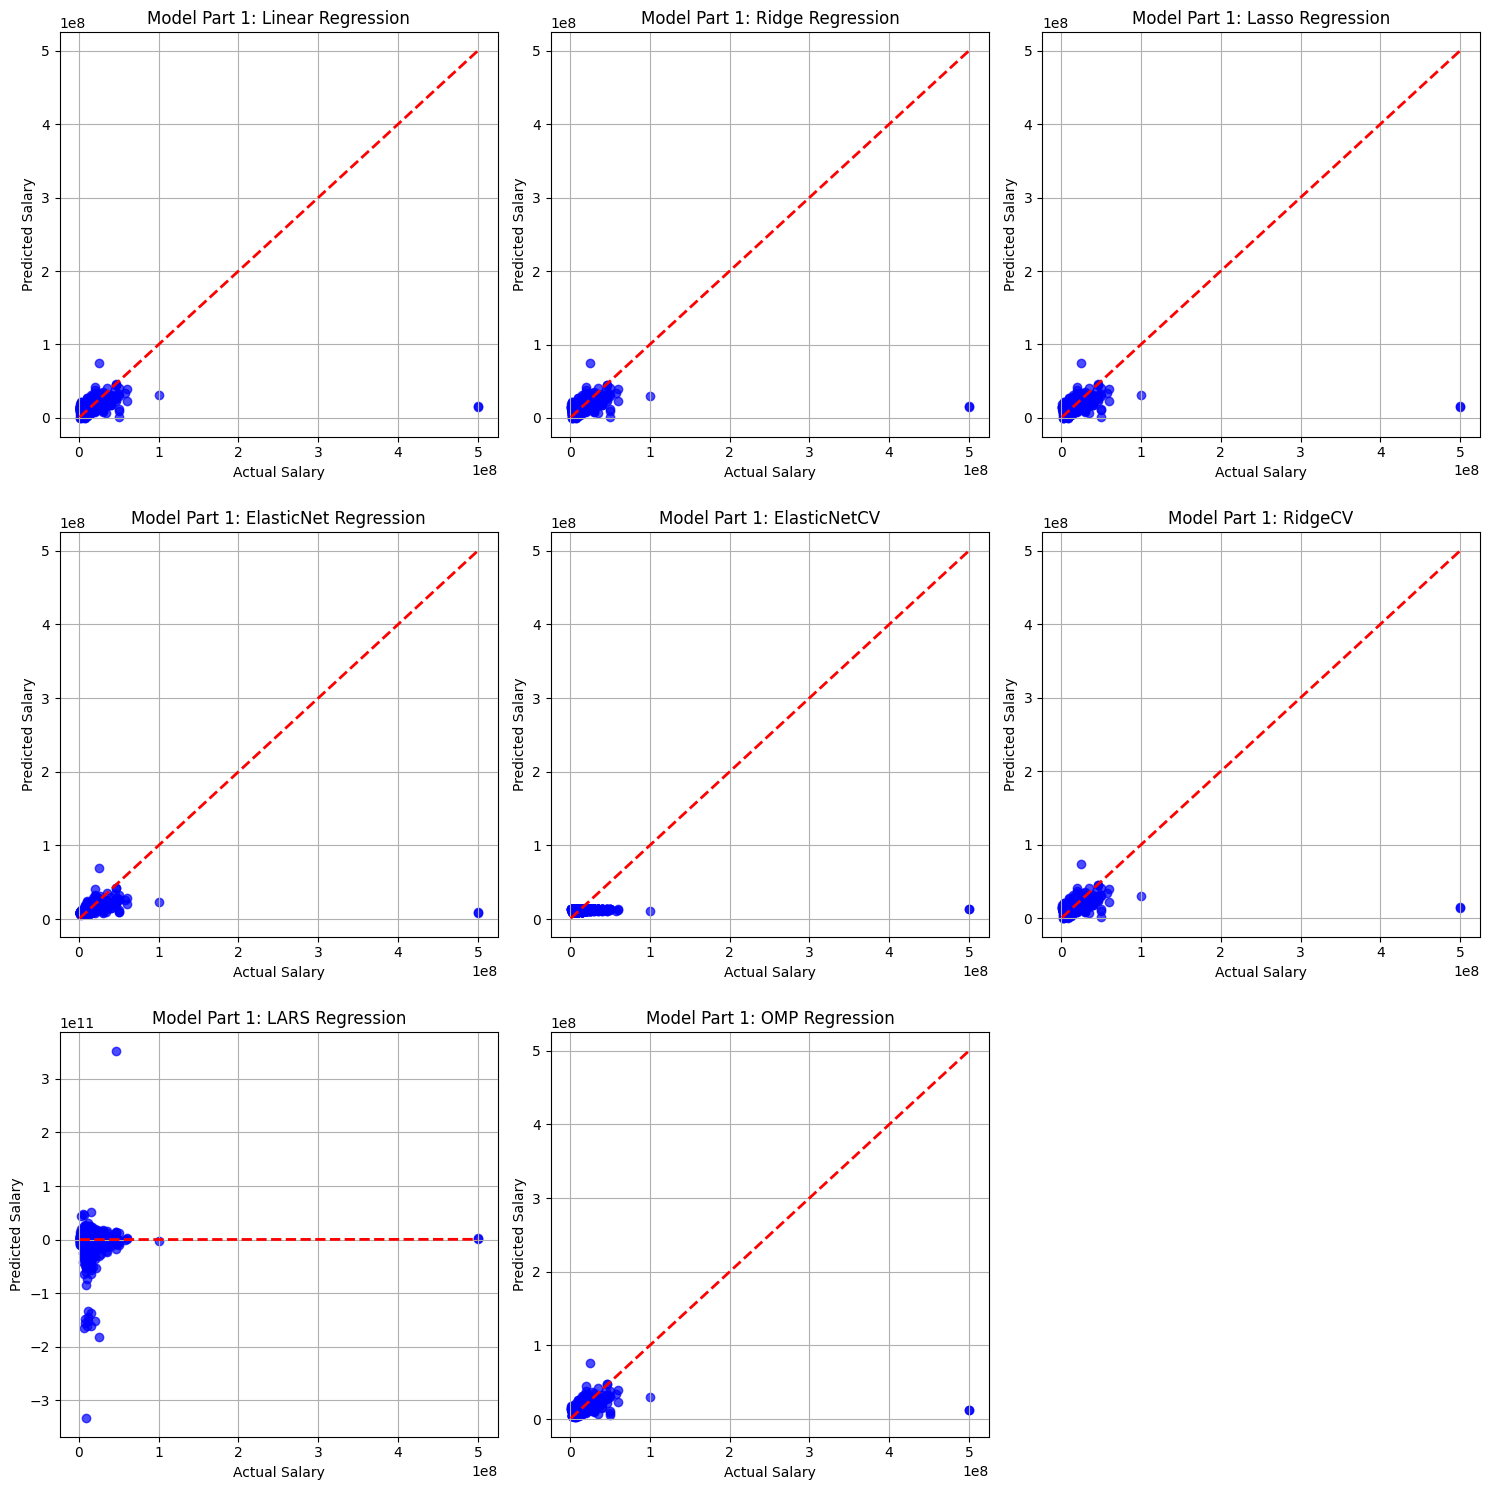

In [11]:
# Hàm vẽ biểu đồ dự đoán so với thực tế
def plot_predictions(models_dict, X_test, y_test, title_prefix="Model"):
    num_models = len(models_dict)
    num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)  # Tính số hàng cần thiết
    
    plt.figure(figsize=(15, 5 * num_rows))  # Tạo một figure với kích thước tùy chỉnh
    
    for i, (model_name, model) in enumerate(models_dict.items()):
        try:
            y_pred = model.predict(X_test)  # Dự đoán trên tập kiểm tra
            plt.subplot(num_rows, 3, i + 1)  # Sắp xếp các biểu đồ thành nhiều hàng (3 biểu đồ mỗi hàng)
            plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # Scatter plot
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Đường tham chiếu y=x
            plt.xlabel("Actual Salary")
            plt.ylabel("Predicted Salary")
            plt.title(f"{title_prefix}: {model_name}")
            plt.grid(True)
        except Exception as e:
            print(f"Error plotting for {model_name}: {e}")

    plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
    plt.show()

# Vẽ biểu đồ cho các mô hình đã huấn luyện
print("Biểu đồ dự đoán cho linear_models:")
plot_predictions(linear_models, X_test, y_test, title_prefix="Model Part 1")

Biểu đồ dự đoán cho non_linear_models:


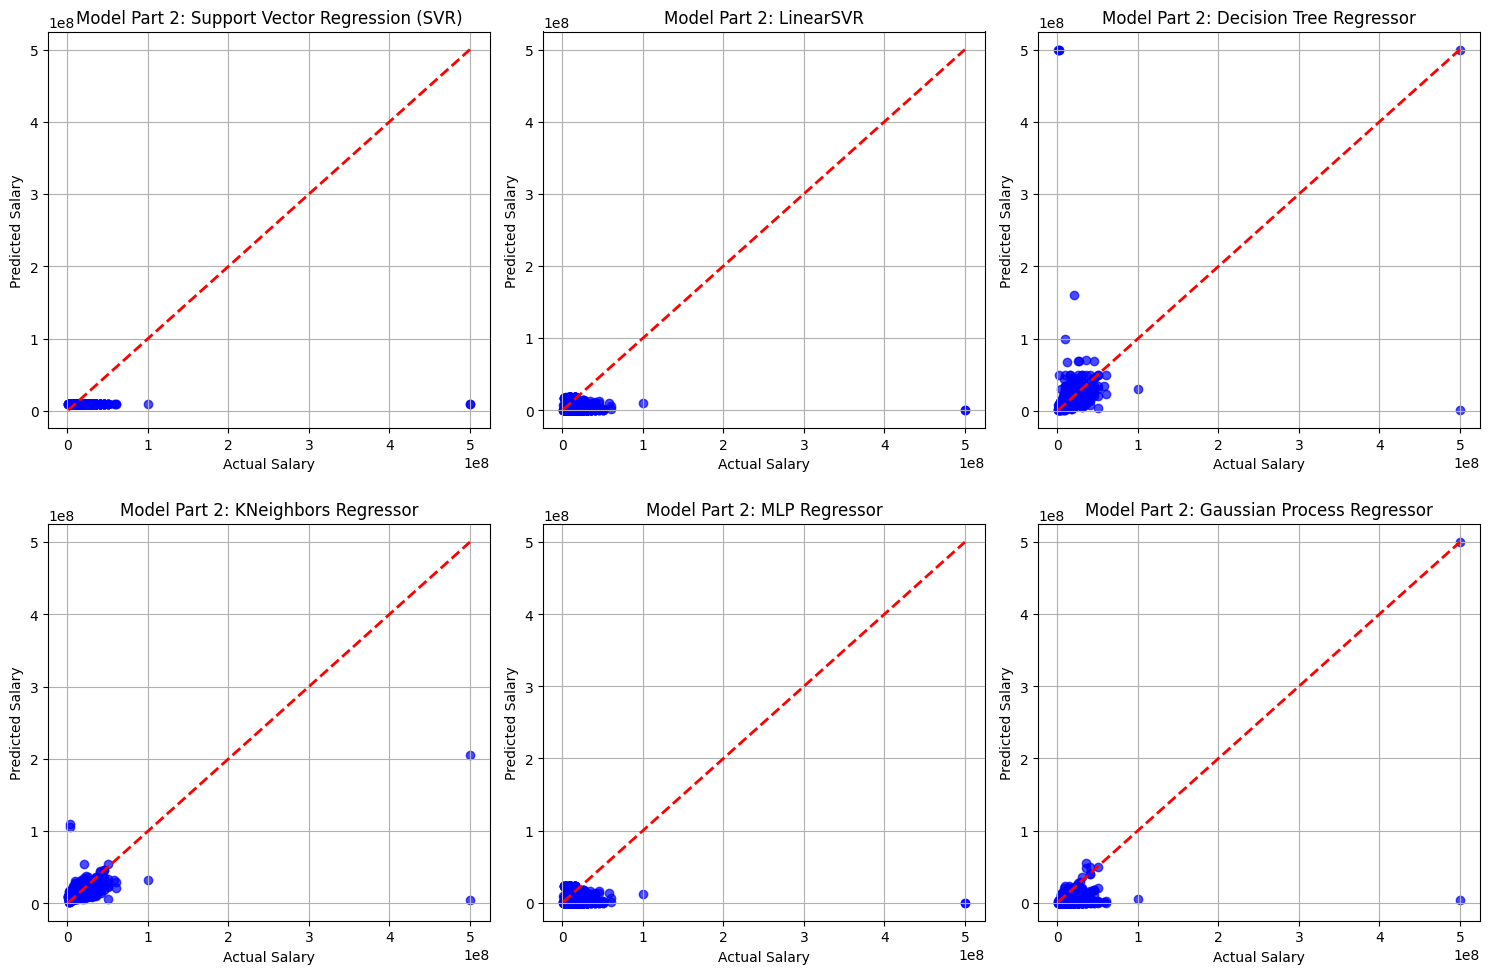

Biểu đồ dự đoán cho tree_models:


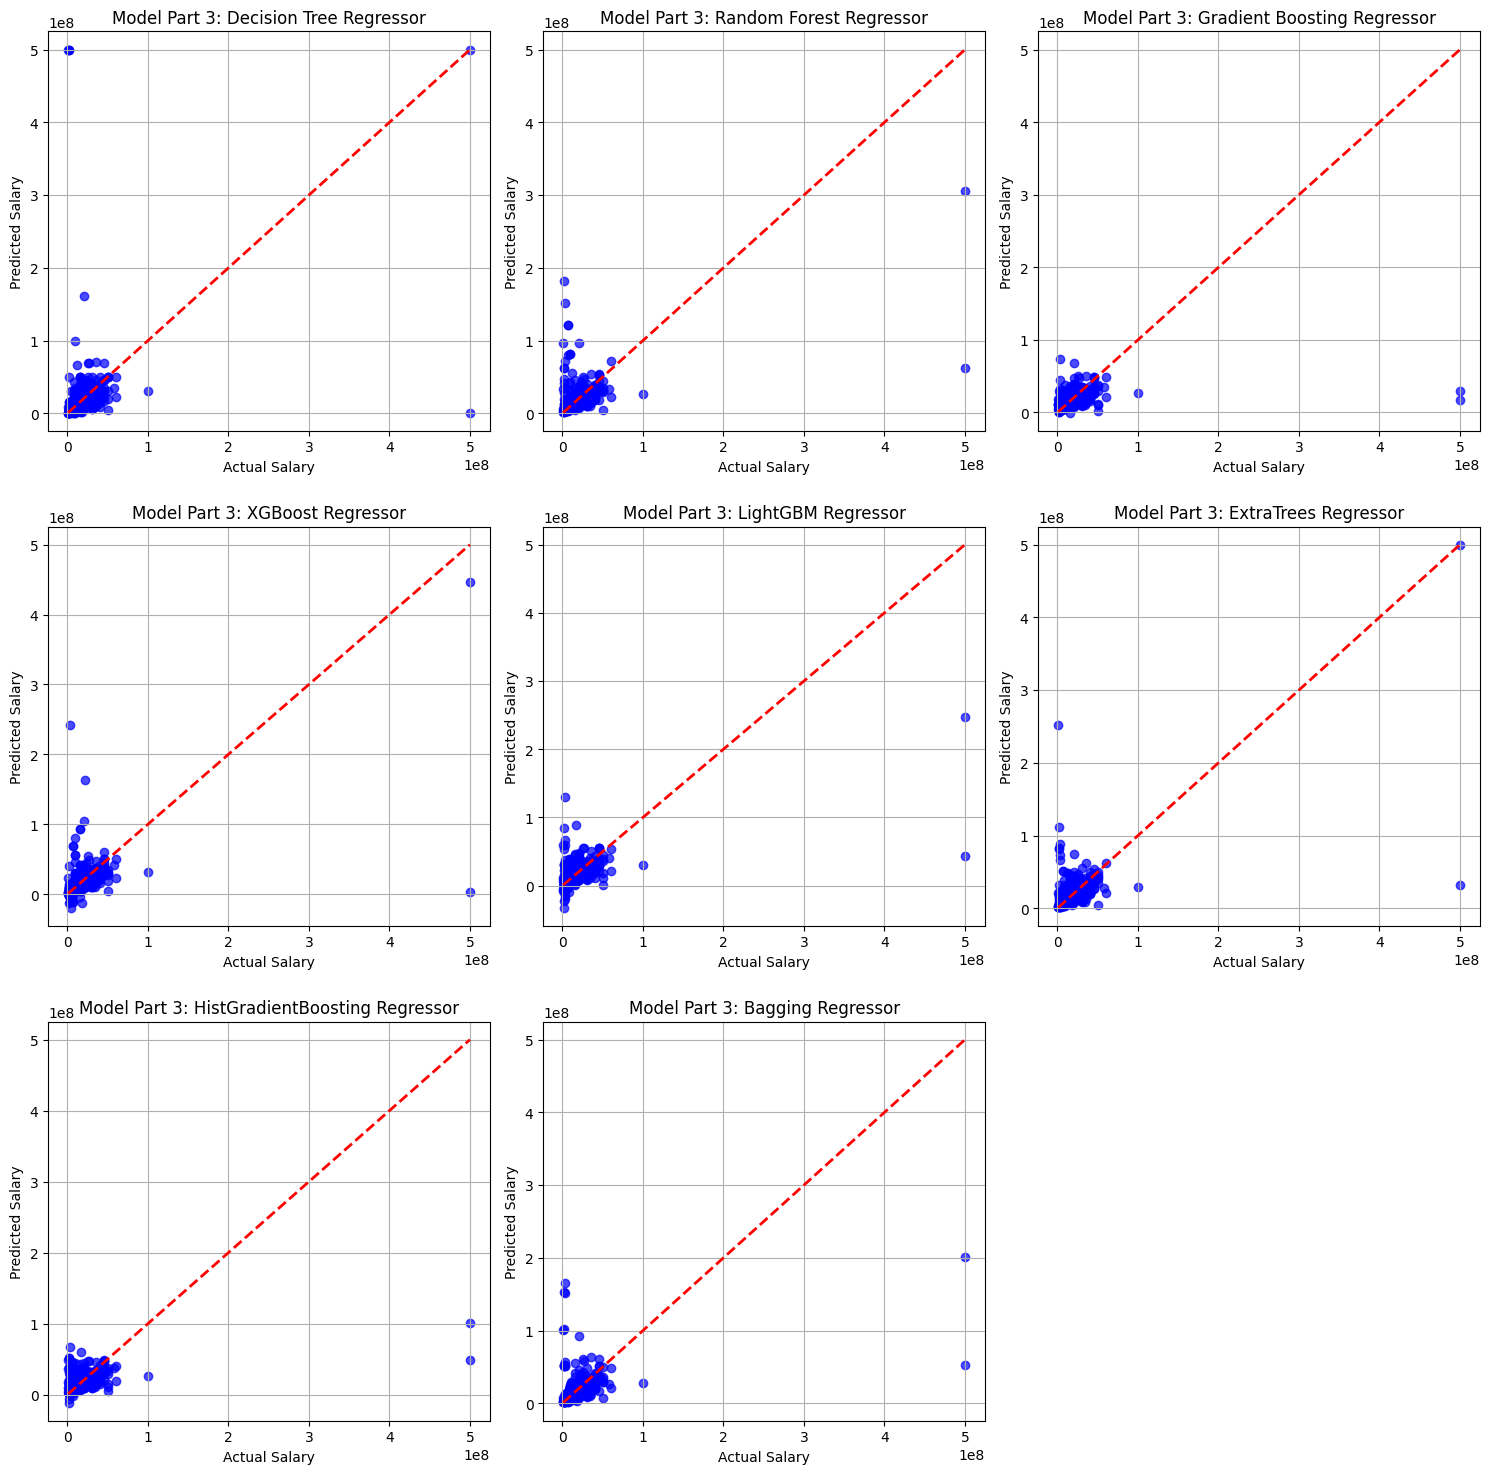

In [14]:
# Vẽ biểu đồ cho model_results_part_2
print("Biểu đồ dự đoán cho non_linear_models:")
plot_predictions(non_linear_models, X_test, y_test, title_prefix="Model Part 2")

# Lặp lại cho các phần còn lại (model_results_part_3 đến model_results_part_10)
print("Biểu đồ dự đoán cho tree_models:")
plot_predictions(tree_models, X_test, y_test, title_prefix="Model Part 3")

Biểu đồ dự đoán cho special models:


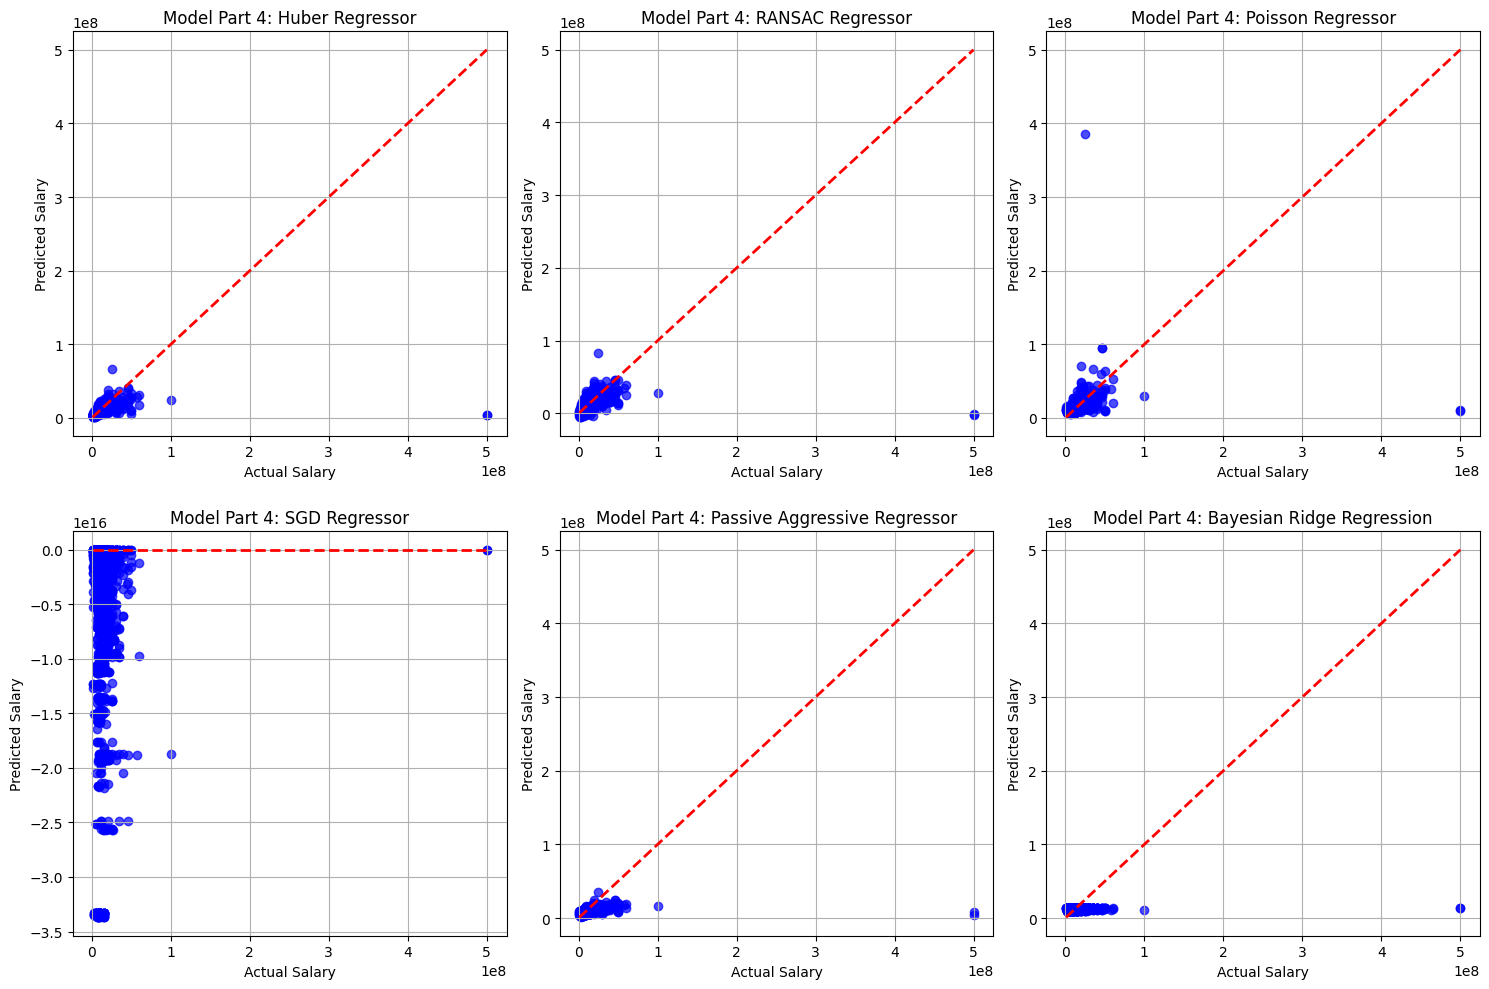

Biểu đồ dự đoán cho ensemble models:


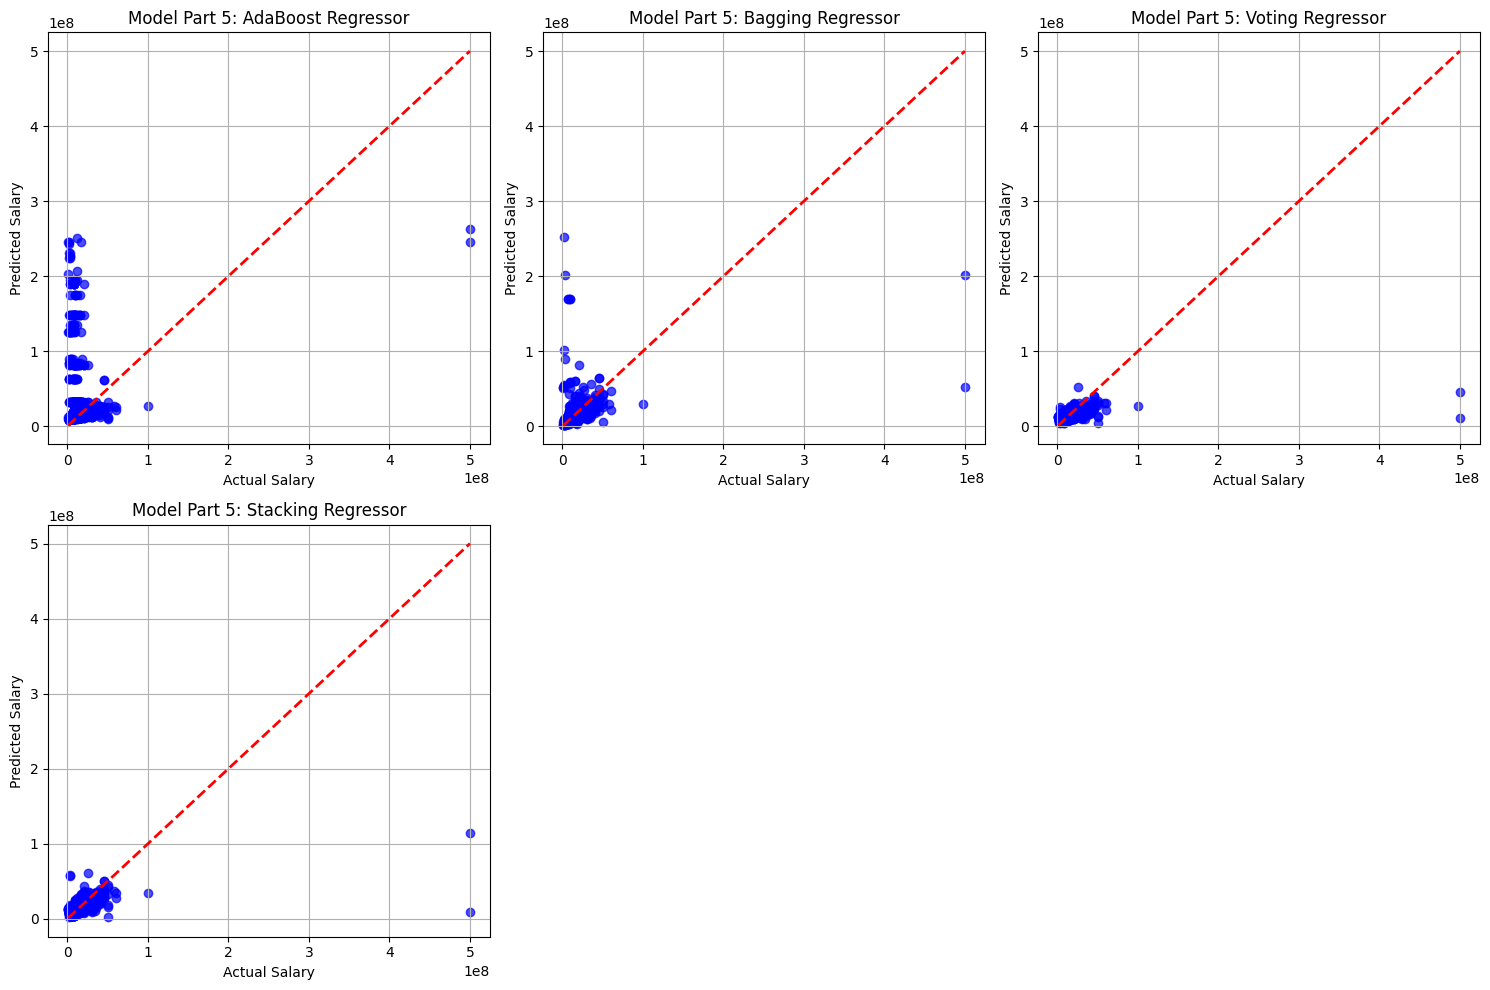

Biểu đồ dự đoán cho clustering models:


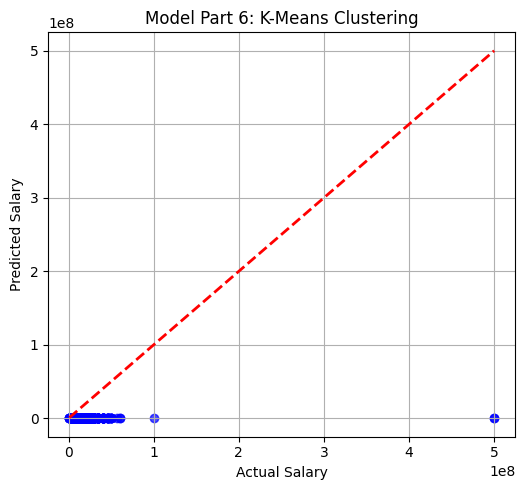

In [15]:
# Đoạn 4
print("Biểu đồ dự đoán cho special models:")
plot_predictions(special_models, X_test, y_test, title_prefix="Model Part 4")

# Đoạn 5
print("Biểu đồ dự đoán cho ensemble models:")
plot_predictions(ensemble_models, X_test, y_test, title_prefix="Model Part 5")

# Đoạn 6
print("Biểu đồ dự đoán cho clustering models:")
plot_predictions(clustering_models, X_test, y_test, title_prefix="Model Part 6")

Linear Regression: MAE=3661838.8767114053, RMSE=13382070.715414926, R²=0.10377896744321002
Ridge Regression: MAE=3661542.3803009572, RMSE=13382088.03579516, R²=0.10377664748848381
Lasso Regression: MAE=3662067.6501726303, RMSE=13382009.693585146, R²=0.10378714090511554
ElasticNet Regression: MAE=3523228.1903029885, RMSE=13486160.072105978, R²=0.08978264673522096
ElasticNetCV: MAE=4944502.310440663, RMSE=14116584.11222672, R²=0.0026956092399605946
RidgeCV: MAE=3646154.256368843, RMSE=13383603.41187264, R²=0.10357366088119935
LARS Regression: MAE=7314361519.060359, RMSE=16007784071.126518, R²=-1282420.8993590618
OMP Regression: MAE=3639275.073783404, RMSE=13442641.362393806, R²=0.09564755907311351
Support Vector Regression (SVR): MAE=4558849.616407101, RMSE=14365446.387830967, R²=-0.032777438705601236
LinearSVR: MAE=10398230.022135181, RMSE=17720925.66171198, R²=-0.5715973874940543
Decision Tree Regressor: MAE=3582633.0004155342, RMSE=19204327.060467575, R²=-0.8457236540535724
KNeighbors

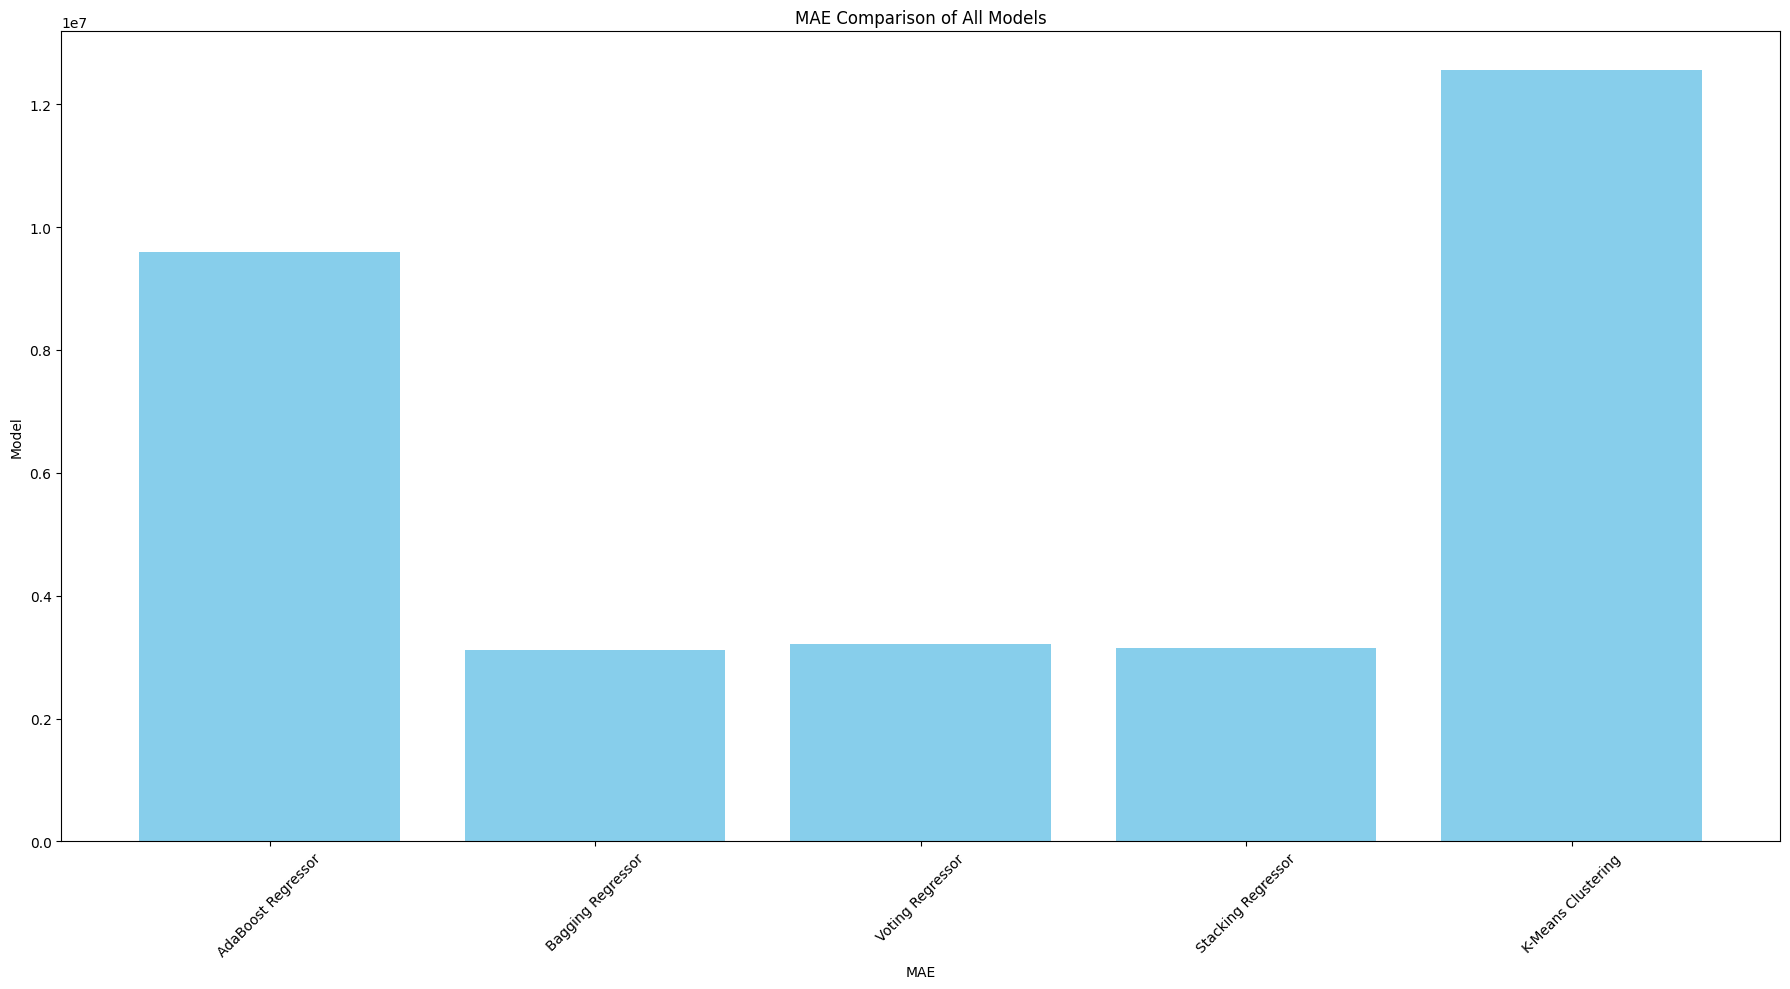

In [17]:
# # Lấy kết quả từ hàm train_and_evaluate
# for i in range(1, 7):
#     globals()[f"model_results_part_{i}"], _ = train_and_evaluate(globals()[f"models_part_{i}"], X_train, y_train, X_test, y_test)

# Gộp tất cả kết quả vào all_models
all_models = {**model_results_part_1,**model_results_part_2,**model_results_part_3,**model_results_part_4, **model_results_part_5,**model_results_part_6}
# Trích xuất MAE từ tất cả các mô hình
model_names = list(all_models.keys())
mae_values = [all_models[model]["MAE"] for model in model_names]
rmse_values = [all_models[model]["RMSE"] for model in model_names]
r2_values = [all_models[model]["R²"] for model in model_names]

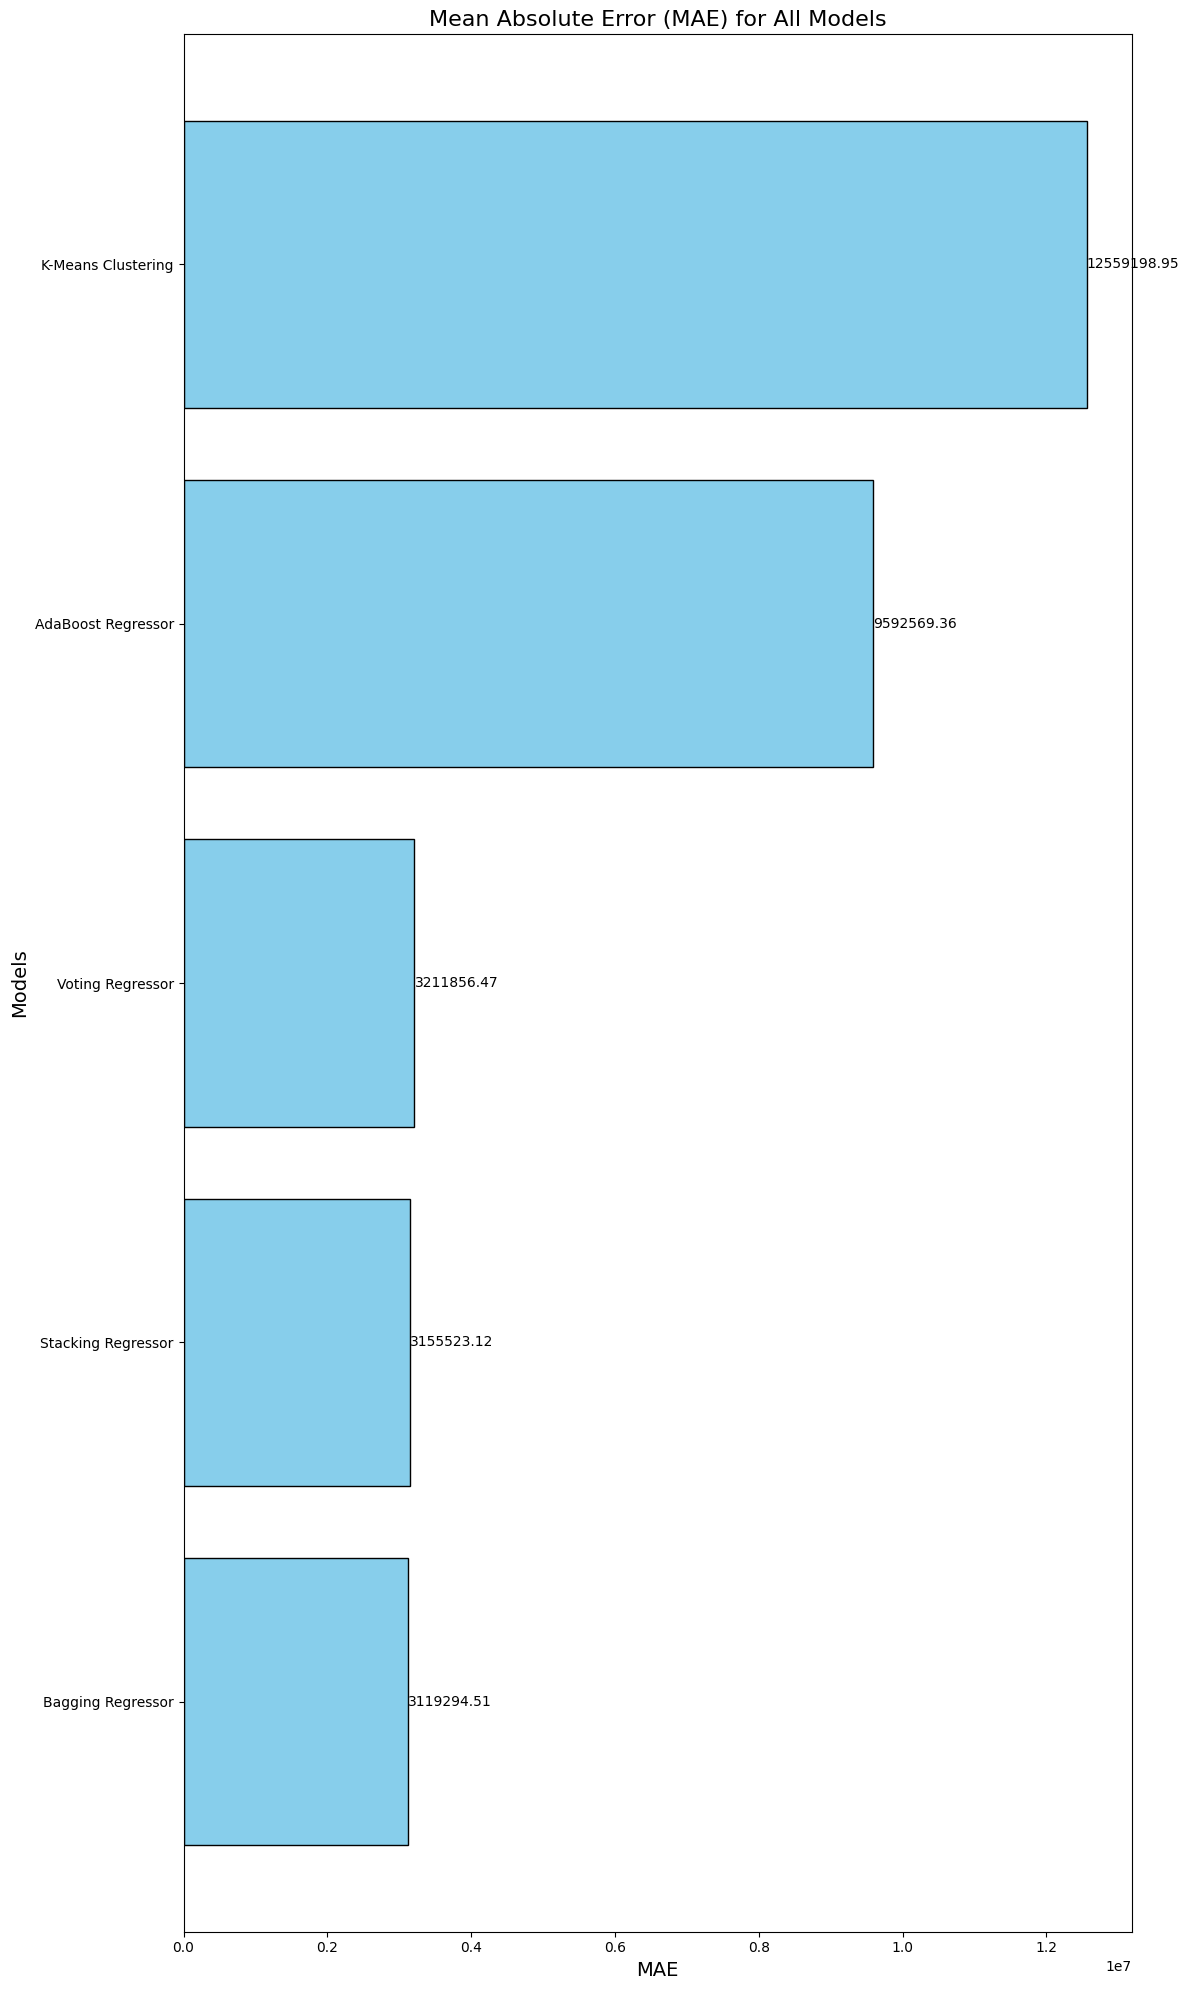

In [20]:
# Vẽ biểu đồ MAE
plt.figure(figsize=(12, 20))

# Sắp xếp các mô hình theo MAE tăng dần
sorted_indices = np.argsort(mae_values)
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_mae_values = [mae_values[i] for i in sorted_indices]

# Vẽ cột biểu đồ
plt.barh(sorted_model_names, sorted_mae_values, color='skyblue', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Mean Absolute Error (MAE) for All Models', fontsize=16)
plt.xlabel('MAE', fontsize=14)
plt.ylabel('Models', fontsize=14)

# Hiển thị giá trị MAE trên từng cột
for i, v in enumerate(sorted_mae_values):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

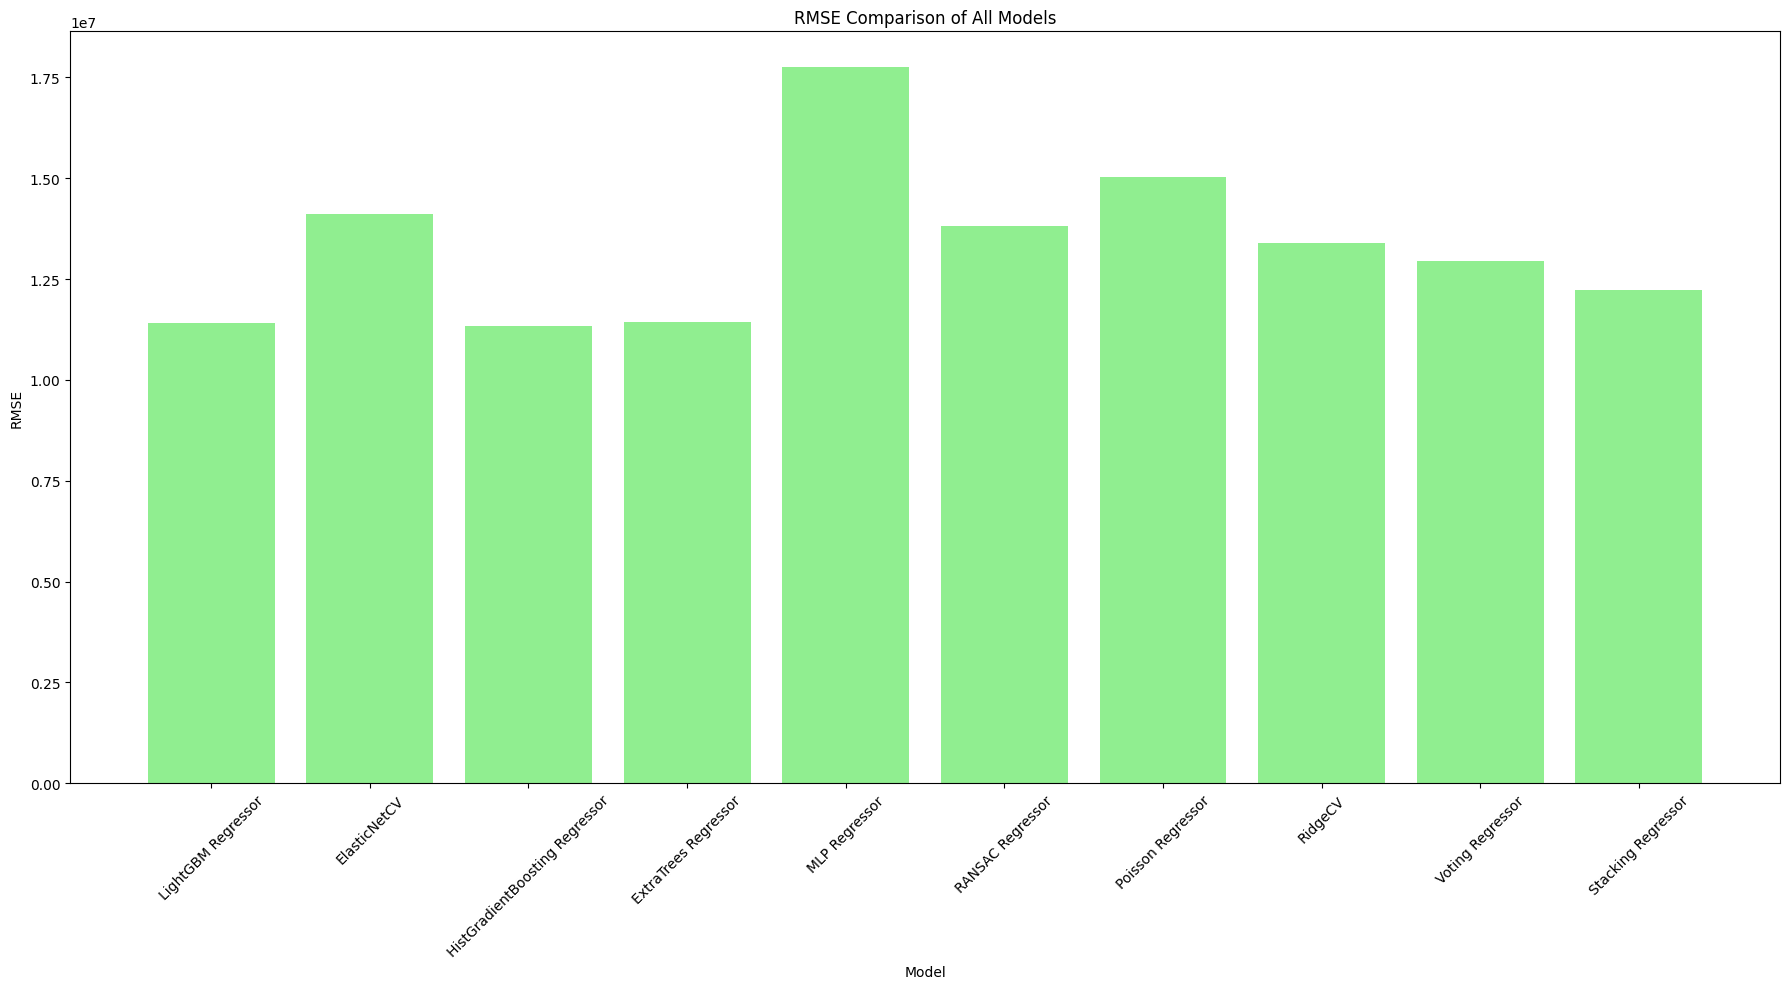

In [17]:
# Vẽ biểu đồ RMSE
plt.figure(figsize=(18, 10))
plt.bar(model_names, rmse_values, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of All Models')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu tên mô hình quá dài
plt.tight_layout()
plt.show()

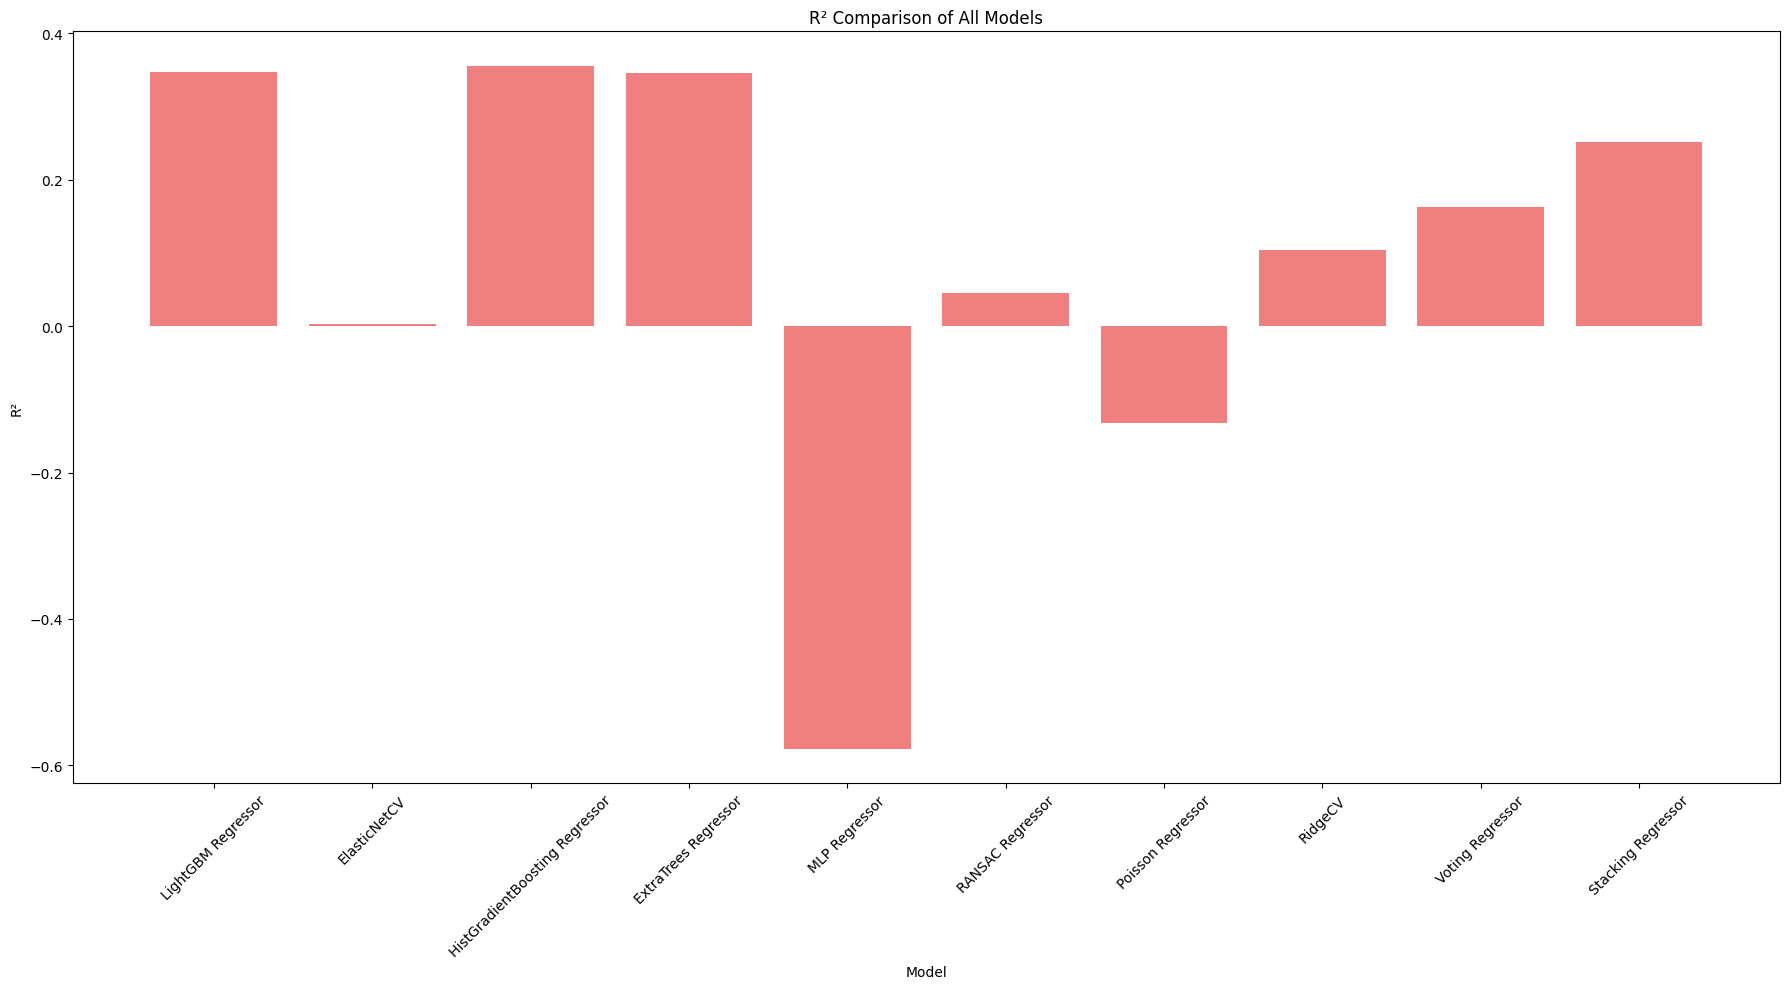

In [18]:
# Vẽ biểu đồ R²
plt.figure(figsize=(18, 10))
plt.bar(model_names, r2_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('R² Comparison of All Models')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu tên mô hình quá dài
plt.tight_layout()
plt.show()

In [19]:
# Tìm mô hình tốt nhất dựa trên MAE, RMSE và R²
best_mae_model = min(all_models, key=lambda model: all_models[model]["MAE"])
best_rmse_model = min(all_models, key=lambda model: all_models[model]["RMSE"])
best_r2_model = max(all_models, key=lambda model: all_models[model]["R²"])

# In kết quả
print(f"Mô hình có MAE thấp nhất: {best_mae_model} với MAE = {all_models[best_mae_model]['MAE']}")
print(f"Mô hình có RMSE thấp nhất: {best_rmse_model} với RMSE = {all_models[best_rmse_model]['RMSE']}")
print(f"Mô hình có R² cao nhất: {best_r2_model} với R² = {all_models[best_r2_model]['R²']}")


Mô hình có MAE thấp nhất: ExtraTrees Regressor với MAE = 2816444.4523463887
Mô hình có RMSE thấp nhất: HistGradientBoosting Regressor với RMSE = 11344717.182547797
Mô hình có R² cao nhất: HistGradientBoosting Regressor với R² = 0.35589623464779696


In [20]:
# Tính MAE max, RMSE max và R² max từ tất cả các mô hình
mae_max = max(all_models[model]["MAE"] for model in all_models)
rmse_max = max(all_models[model]["RMSE"] for model in all_models)
r2_max = max(all_models[model]["R²"] for model in all_models)

# Tính chỉ số tổng hợp cho mỗi mô hình
model_scores = {}
for model in all_models:
    normalized_mae = all_models[model]["MAE"] / mae_max
    normalized_rmse = all_models[model]["RMSE"] / rmse_max
    normalized_r2 = 1 - all_models[model]["R²"]  # Vì R² càng cao càng tốt
    score = normalized_mae + normalized_rmse + normalized_r2
    model_scores[model] = score

# Chọn mô hình tốt nhất (mô hình có score thấp nhất)
best_model = min(model_scores, key=model_scores.get)

# In kết quả
print(f"Mô hình tốt nhất là: {best_model} với chỉ số tổng hợp = {model_scores[best_model]}")

Mô hình tốt nhất là: ExtraTrees Regressor với chỉ số tổng hợp = 1.5657557842712613


In [ ]:
def train_and_evaluate_optimized(models_dict, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model_info in models_dict.items():
        try:
            # Sử dụng RepeatedKFold cho việc chia dữ liệu
            rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
            
            grid_search = RandomizedSearchCV(
                estimator=model_info["model"],
                param_distributions=model_info["params"],
                n_iter=100,
                cv=rkf,  # Thay vì cv=5
                scoring="neg_mean_absolute_error",
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            # Mô hình hồi quy
            y_pred = best_model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            results[model_name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
            print(f"{model_name}: MAE={mae}, RMSE={rmse}, R²={r2}")
        except Exception as e:
            print(f"Error in {model_name}: {e}")
    return results

models_selected = {
    "ExtraTrees Regressor": {
        "model": ExtraTreesRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200, 300],
            "max_depth": [3, 5, 7, 10, None],
            "min_samples_split": [2, 5, 10, 15],
            "min_samples_leaf": [1, 2, 4, 8],
            "max_features": ["sqrt", "log2", None],
            "bootstrap": [True, False]
        }
    }
}

model_results = train_and_evaluate_optimized(models_selected, X_train, y_train, X_test, y_test)